In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from adjustText import adjust_text
import requests
from io import BytesIO

COLORS = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

team_logos = pd.read_csv('https://raw.githubusercontent.com/guga31bb/nflfastR-data/master/teams_colors_logos.csv')
logos = pd.Series(team_logos.team_logo_wikipedia.values,index=team_logos.team_abbr).to_dict()

In [2]:
#Single season
YEAR = 2020

data = pd.read_csv(
    'https://github.com/guga31bb/nflfastR-data/blob/master/data/play_by_play_' \
    + str(YEAR) + '.csv.gz?raw=True',compression='gzip', low_memory=False
    )

In [3]:
df = data[
        (data.play_type.isin(['pass','run', 'no_play'])) &
        (data.two_point_attempt==0) &
        (data['epa'].isna()==False) & 
        (data['week'] < 18)
        ]

# Team stats:

In [4]:
off_data = (
    df.groupby(['posteam']).agg({'epa': 'mean', 'wpa': 'count'})
).reset_index()

off_data.columns = ['team', 'off_epa', 'off_plays']

def_data = (
    df.groupby(['defteam']).agg({'epa': 'mean', 'wpa': 'count'})
).reset_index()

def_data['epa'] = -def_data['epa']

def_data.columns = ['team', 'def_epa', 'def_plays']

epa_data = pd.merge(off_data, def_data, left_on='team', right_on='team')

Text(0.72, 0.06, 'Author: KiraQQ, Data: nflfastR')

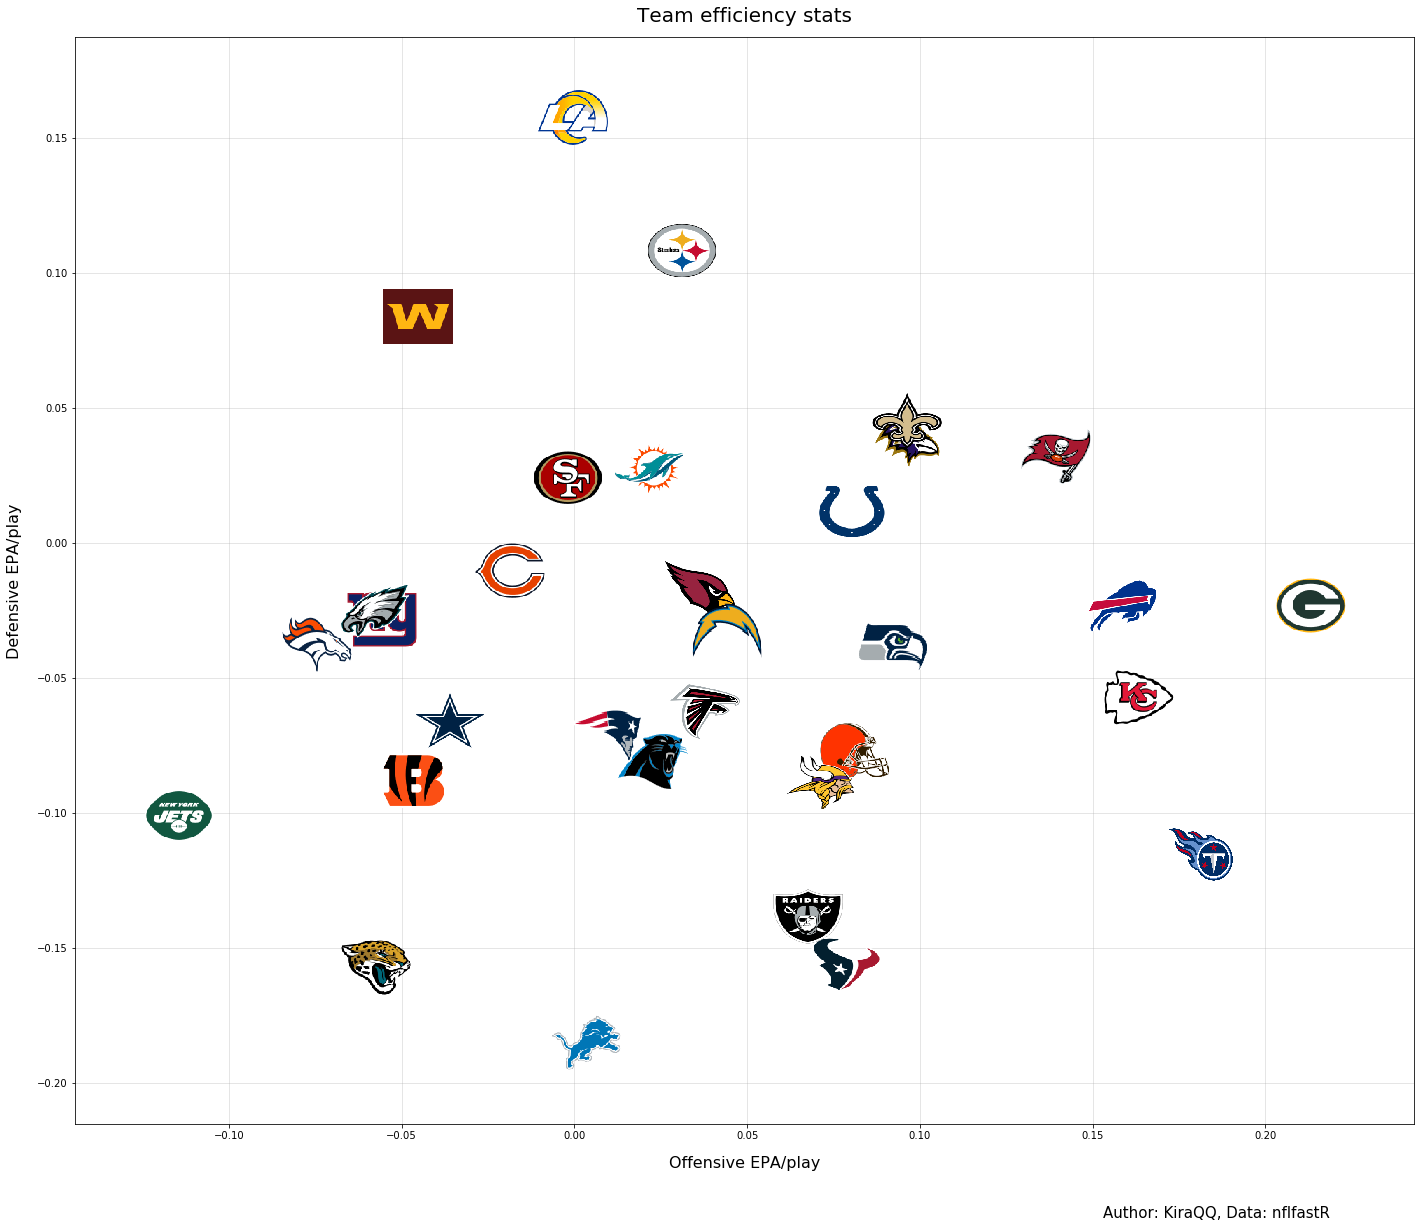

In [5]:
fig, ax = plt.subplots(figsize=(24,20))
x = epa_data['off_epa'].values
y = epa_data['def_epa'].values

#Add grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)
ax.set_ylim(y.min() - 0.03, y.max() + 0.03)
ax.set_xlim(x.min() - 0.03, x.max() + 0.03)

# annotate the points with team logos
for idx, row in epa_data.iterrows():
  logo_src = team_logos[team_logos['team_abbr'] == str(epa_data['team'][idx])]['team_logo_wikipedia'].values[0]
  res = requests.get(logo_src)
  img = plt.imread(BytesIO(res.content))
  ax.imshow(img, extent=[row['off_epa']-0.01, row['off_epa']+0.01, row['def_epa']-0.01, row['def_epa']+0.01], aspect='auto', zorder=1000)

#Add title, labels, and cite the data source
ax.set_title('Team efficiency stats',fontsize=20,pad=15)
ax.set_xlabel('Offensive EPA/play',fontsize=16,labelpad=15)
ax.set_ylabel('Defensive EPA/play',fontsize=16,labelpad=15)
plt.figtext(.72,.06,'Author: KiraQQ, Data: nflfastR',fontsize=15)

In [6]:
df_early = df[
    (df.down > 0) & (df.down < 3)
]

early_avg = df_early['success'].mean()

early_data = (
    df_early.groupby(['posteam']).agg({'success': 'mean', 'wpa': 'count'})
).reset_index()

early_data.sort_values('success', ascending=False, inplace=True)
early_data['color'] = early_data['posteam'].map(COLORS)
early_data['path'] = early_data['posteam'].map(logos)
early_data.reset_index(inplace=True)

Text(0.72, 0.06, 'Author: KiraQQ, Data: nflfastR')

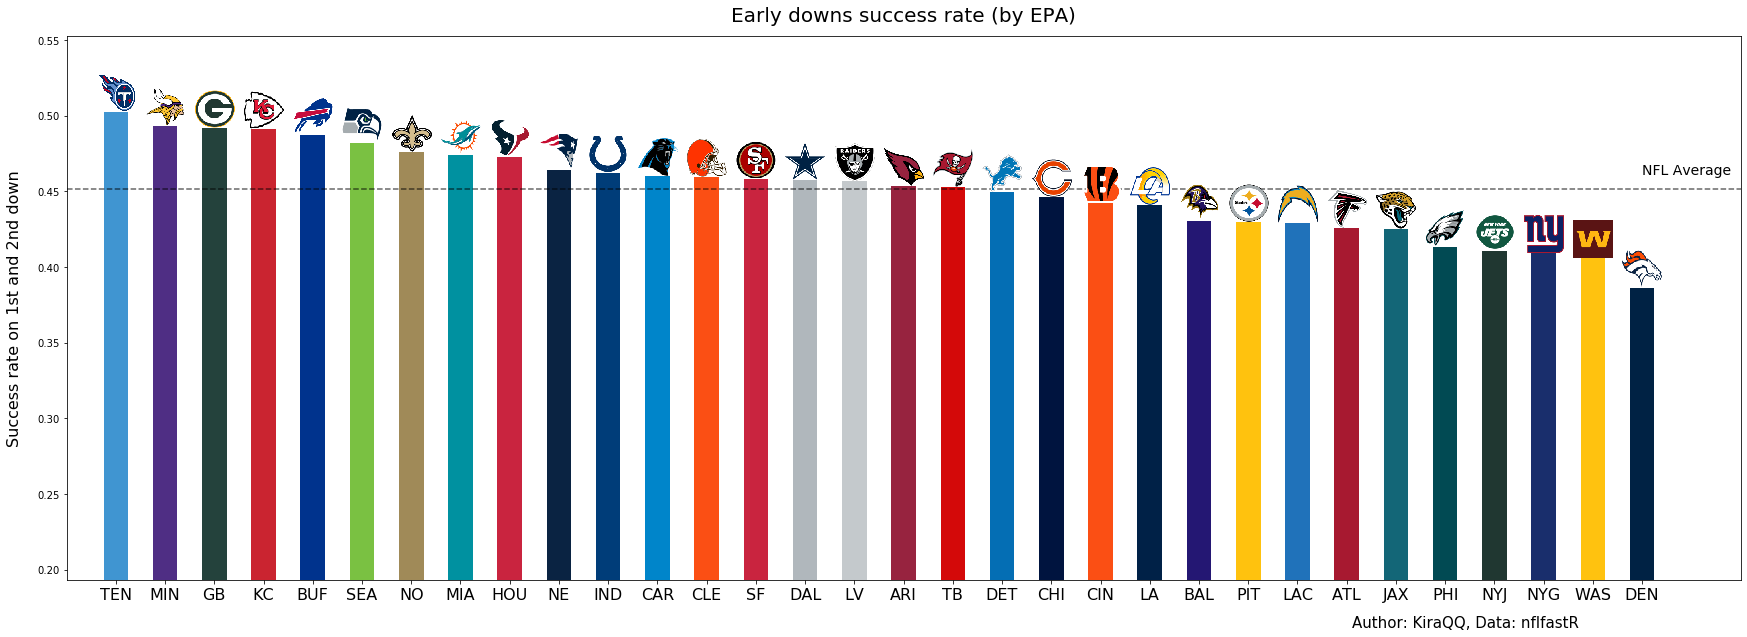

In [7]:
fig, ax = plt.subplots(figsize=(30,10))

ax.bar(np.arange(0,32), early_data['success'], color=early_data.color, width=.5)
ax.set_ylim(early_data['success'].min()/2, early_data['success'].max() + 0.05)
ax.set_xlim(-1, 33)

for idx, row in early_data.iterrows():
    logo_src = str(row['path'])
    res = requests.get(logo_src)
    img = plt.imread(BytesIO(res.content))
    ax.imshow(img, extent=[idx-0.4, idx+0.4, row['success'], row['success']+0.025], aspect='auto', zorder=1000)
    
#Add title, labels, and cite the data source
ax.set_title('Early downs success rate (by EPA)',fontsize=20,pad=15)
ax.set_ylabel('Success rate on 1st and 2nd down',fontsize=16,labelpad=15)
ax.set_xticks(np.arange(0,32))
ax.set_xticklabels(early_data.posteam,fontsize=16)

#Add league average line and label
ax.axhline(y=early_avg,linestyle='--',color='black', alpha=.6)
plt.text(31, early_avg + 0.01, 'NFL Average',fontsize=14)

plt.figtext(.72,.06,'Author: KiraQQ, Data: nflfastR',fontsize=15)

In [8]:
df_late = df[
    (df.down > 2) & (df.down < 5)
]

late_avg = df_late['success'].mean()

late_data = (
    df_late.groupby(['posteam']).agg({'success': 'mean', 'wpa': 'count'})
).reset_index()

late_data.sort_values('success', ascending=False, inplace=True)
late_data['color'] = late_data['posteam'].map(COLORS)
late_data['path'] = late_data['posteam'].map(logos)
late_data.reset_index(inplace=True)

Text(0.72, 0.06, 'Author: KiraQQ, Data: nflfastR')

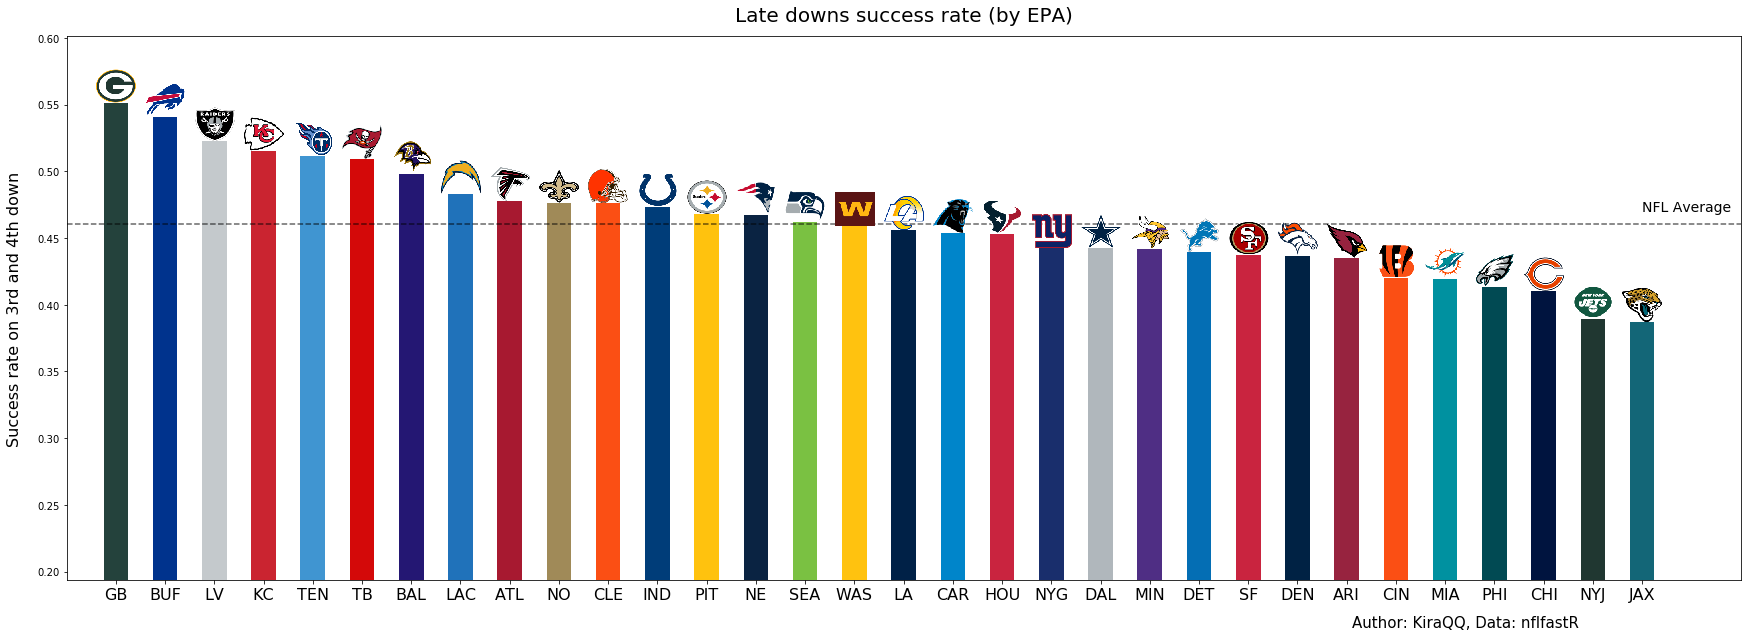

In [9]:
fig, ax = plt.subplots(figsize=(30,10))

ax.bar(np.arange(0,32), late_data['success'], color=late_data.color, width=.5)
ax.set_ylim(late_data['success'].min()/2, late_data['success'].max() + 0.05)
ax.set_xlim(-1, 33)

for idx, row in late_data.iterrows():
    logo_src = str(row['path'])
    res = requests.get(logo_src)
    img = plt.imread(BytesIO(res.content))
    ax.imshow(img, extent=[idx-0.4, idx+0.4, row['success'], row['success']+0.025], aspect='auto', zorder=1000)
    
#Add title, labels, and cite the data source
ax.set_title('Late downs success rate (by EPA)',fontsize=20,pad=15)
ax.set_ylabel('Success rate on 3rd and 4th down',fontsize=16,labelpad=15)
ax.set_xticks(np.arange(0,32))
ax.set_xticklabels(late_data.posteam,fontsize=16)

#Add league average line and label
ax.axhline(y=late_avg,linestyle='--',color='black', alpha=.6)
plt.text(31, late_avg + 0.01, 'NFL Average',fontsize=14)

plt.figtext(.72,.06,'Author: KiraQQ, Data: nflfastR',fontsize=15)

# Player stats:

In [10]:
qb_data = (
    df.groupby(['passer','posteam']).agg({'epa': 'mean','cpoe': 'mean', 'yards_gained': 'sum', 'pass_touchdown': 'sum', 'wpa': 'count'})
    ).reset_index(level='posteam')

qb_data = qb_data.loc[qb_data.wpa > 160]
qb_data.sort_values('epa', ascending=False, inplace=True)
qb_data.columns = ['posteam', 'EPA_play', 'CPOE', 'yards', 'pTD', 'Plays']

Text(0.72, 0.06, 'Author: KiraQQ, Data: nflfastR')

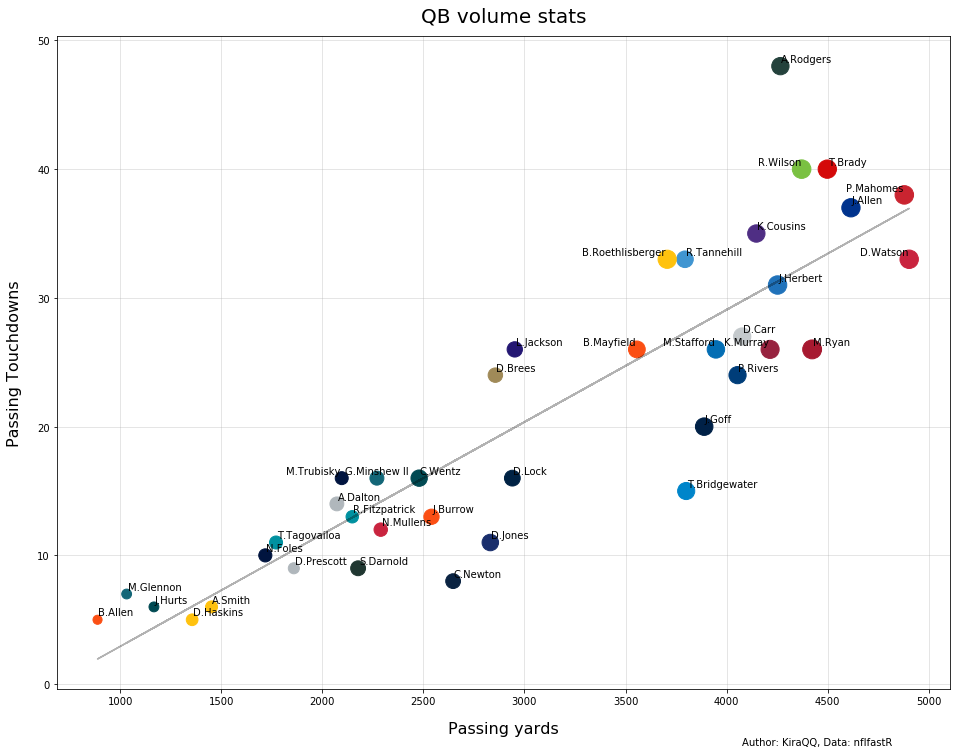

In [11]:
fig, ax = plt.subplots(figsize=(16,12))
qb_data['color'] = qb_data['posteam'].map(COLORS)
ax.scatter(x = qb_data.yards, y = qb_data.pTD, s = qb_data.Plays/2, c = qb_data.color)

texts = [plt.text(x0+0.1,y0+0.1,name,ha='right',va='bottom') for x0,y0,name in zip(
    qb_data.yards, qb_data.pTD, qb_data.index)]

adjust_text(texts)

#Add grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Add trend line
m, b = np.polyfit(qb_data.yards, qb_data.pTD, 1)
plt.plot(qb_data.yards, m*qb_data.yards + b, 'k', alpha=.3,linestyle='-')

#Add title, labels, and cite the data source
ax.set_title('QB volume stats',fontsize=20,pad=15)
ax.set_xlabel('Passing yards',fontsize=16,labelpad=15)
ax.set_ylabel('Passing Touchdowns',fontsize=16,labelpad=15)
plt.figtext(.72,.06,'Author: KiraQQ, Data: nflfastR',fontsize=10)

Text(0.72, 0.06, 'Author: KiraQQ, Data: nflfastR')

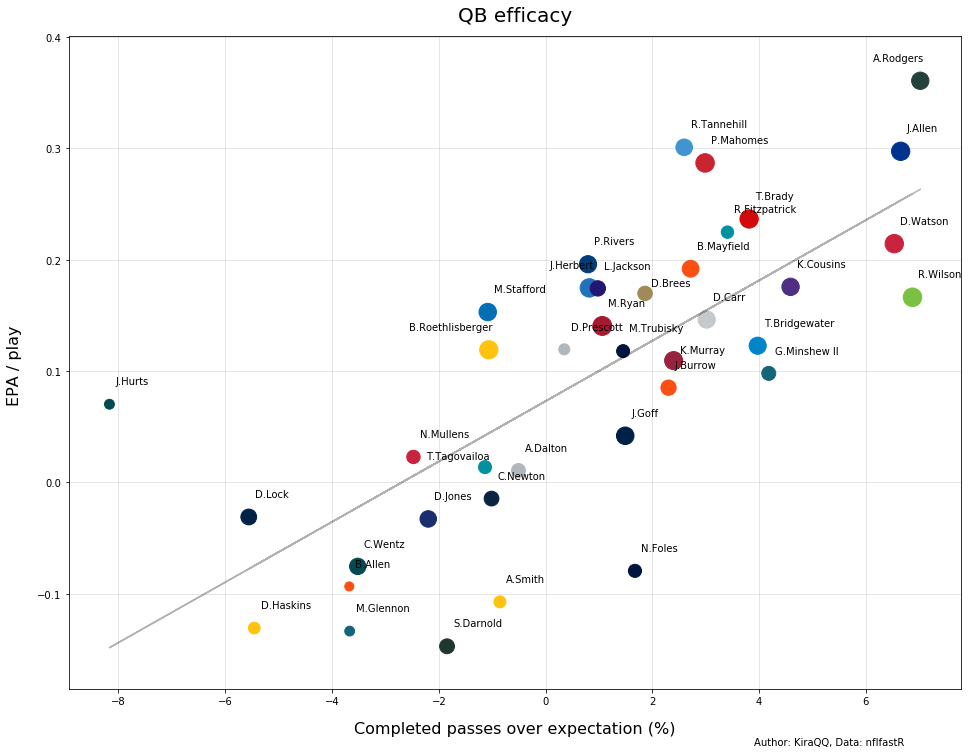

In [12]:
fig, ax = plt.subplots(figsize=(16,12))
qb_data['color'] = qb_data['posteam'].map(COLORS)
ax.scatter(x = qb_data.CPOE, y = qb_data.EPA_play, s = qb_data.Plays/2, c = qb_data.color)

texts = [plt.text(x0+0.1,y0+0.015,name,ha='right',va='bottom') for x0,y0,name in zip(
    qb_data.CPOE, qb_data.EPA_play, qb_data.index)]

adjust_text(texts)

#Add grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Add trend line
m, b = np.polyfit(qb_data.CPOE, qb_data.EPA_play, 1)
plt.plot(qb_data.CPOE, m*qb_data.CPOE + b, 'k', alpha=.3,linestyle='-')

#Add title, labels, and cite the data source
ax.set_title('QB efficacy',fontsize=20,pad=15)
ax.set_xlabel('Completed passes over expectation (%)',fontsize=16,labelpad=15)
ax.set_ylabel('EPA / play ',fontsize=16,labelpad=15)
plt.figtext(.72,.06,'Author: KiraQQ, Data: nflfastR',fontsize=10)

In [13]:
wr_data = (
    df.groupby(['receiver','posteam']).agg({'epa': 'mean','cpoe': 'mean', 'yards_gained': 'sum', 'pass_touchdown': 'sum', 'wpa': 'count'})
    ).reset_index(level='posteam')

wr_data = wr_data.loc[wr_data.wpa > 80]
wr_data.sort_values('yards_gained', ascending=False, inplace=True)
wr_data.columns = ['posteam', 'EPA_play', 'CPOE', 'yards', 'pTD', 'Plays']

Text(0.72, 0.06, 'Author: KiraQQ, Data: nflfastR')

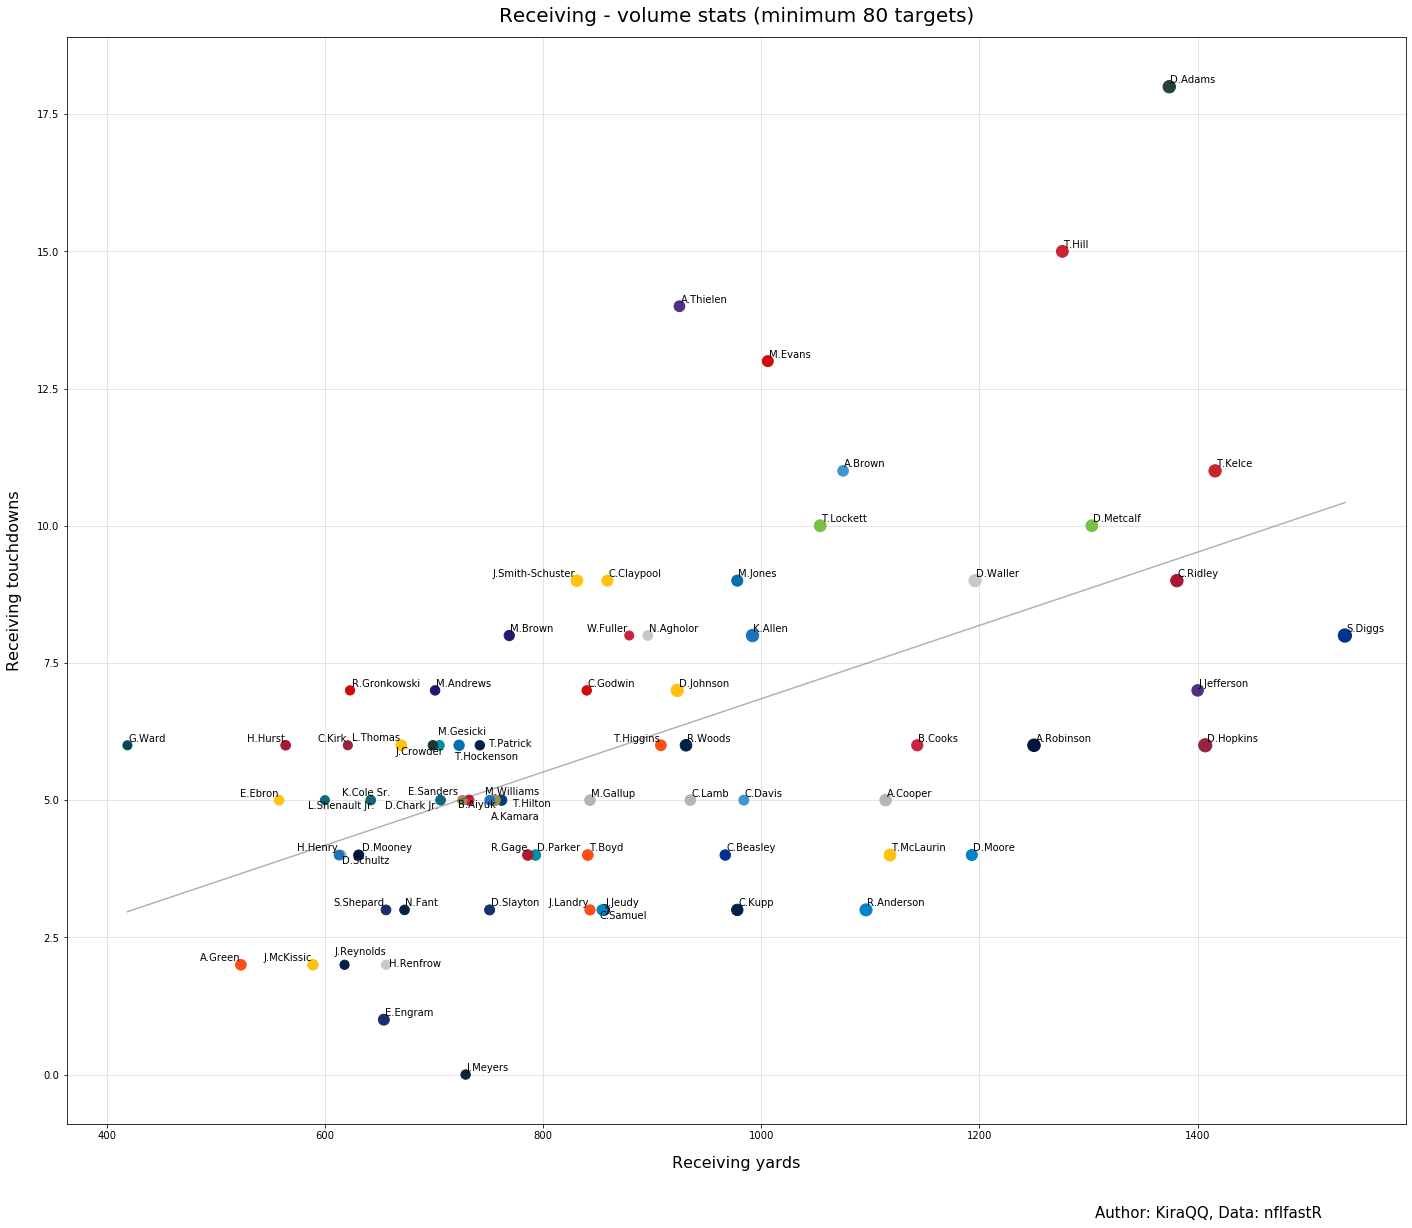

In [14]:
fig, ax = plt.subplots(figsize=(24,20))
wr_data['color'] = wr_data['posteam'].map(COLORS)
ax.scatter(x = wr_data.yards, y = wr_data.pTD, s = wr_data.Plays, c = wr_data.color)

texts = [plt.text(x0+0.1,y0+0.015,name,ha='right',va='bottom') for x0,y0,name in zip(
    wr_data.yards, wr_data.pTD, wr_data.index)]

adjust_text(texts)

#Add grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Add trend line
m, b = np.polyfit(wr_data.yards, wr_data.pTD, 1)
plt.plot(wr_data.yards, m*wr_data.yards + b, 'k', alpha=.3,linestyle='-')

#Add title, labels, and cite the data source
ax.set_title('Receiving - volume stats (minimum 80 targets)',fontsize=20,pad=15)
ax.set_xlabel('Receiving yards',fontsize=16,labelpad=15)
ax.set_ylabel('Receiving touchdowns',fontsize=16,labelpad=15)
plt.figtext(.72,.06,'Author: KiraQQ, Data: nflfastR',fontsize=15)

Text(0.72, 0.06, 'Author: KiraQQ, Data: nflfastR')

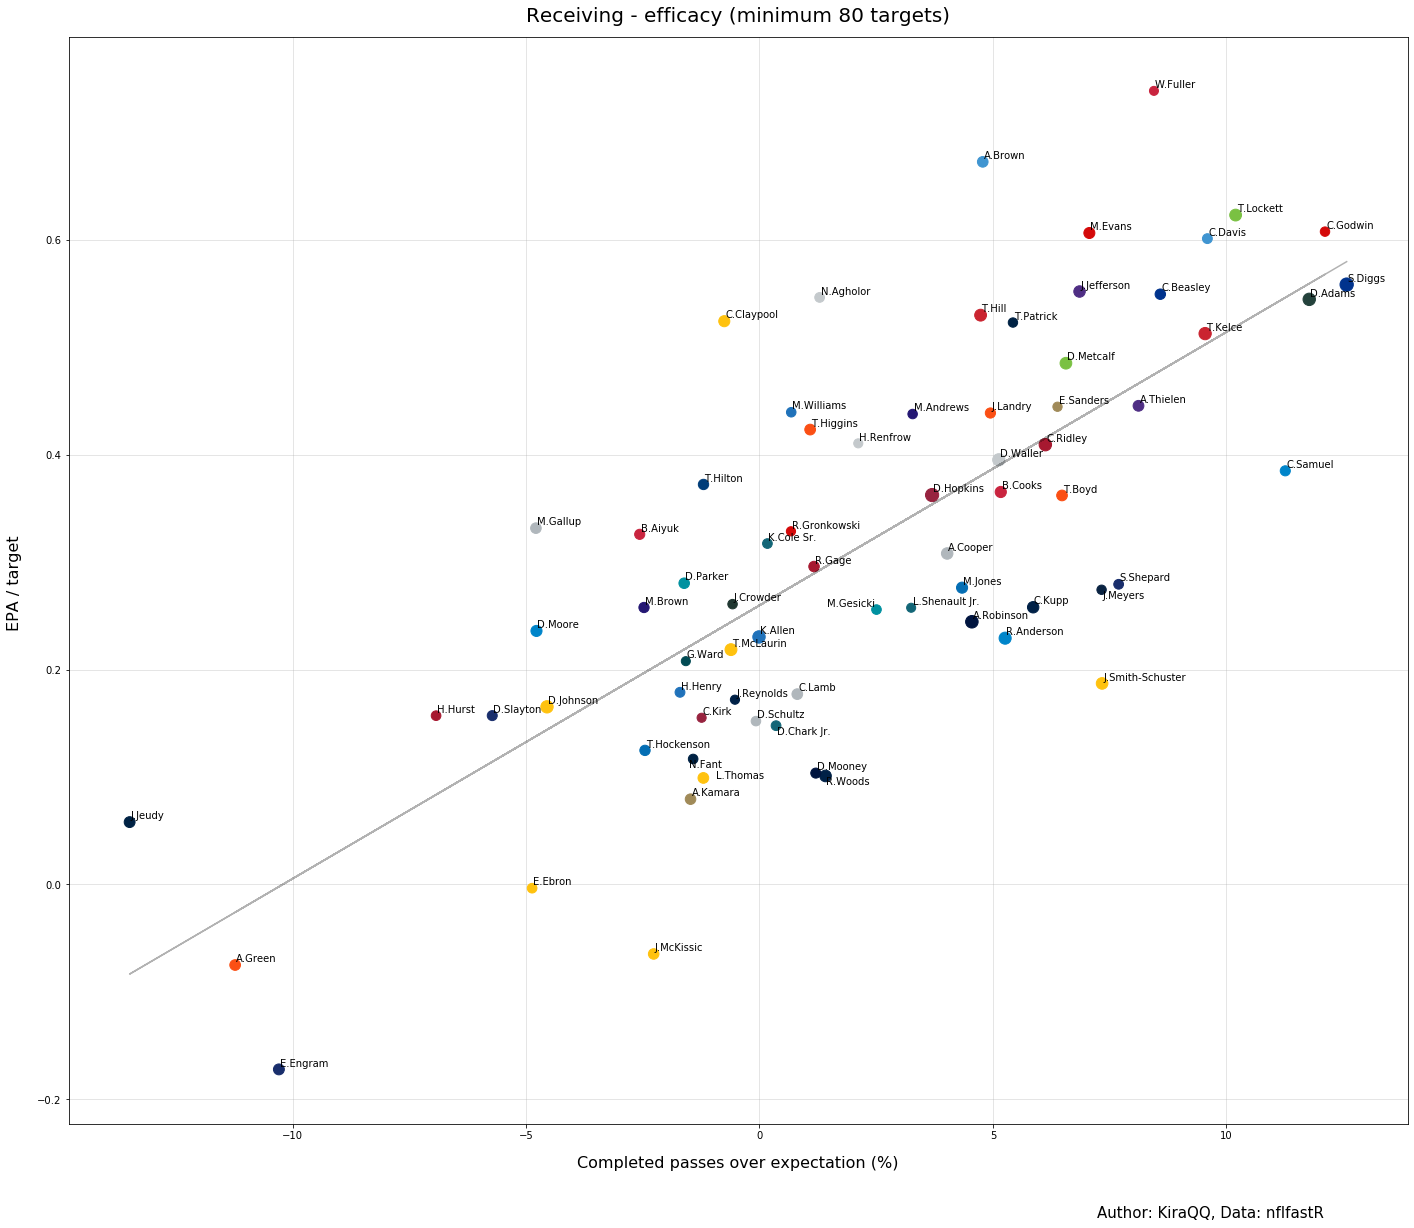

In [15]:
fig, ax = plt.subplots(figsize=(24,20))
wr_data['color'] = wr_data['posteam'].map(COLORS)
ax.scatter(x = wr_data.CPOE, y = wr_data.EPA_play, s = wr_data.Plays, c = wr_data.color)

texts = [plt.text(x0,y0,name,ha='right',va='bottom') for x0,y0,name in zip(
    wr_data.CPOE, wr_data.EPA_play, wr_data.index)]


adjust_text(texts)

#Add grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Add trend line
m, b = np.polyfit(wr_data.CPOE, wr_data.EPA_play, 1)
plt.plot(wr_data.CPOE, m*wr_data.CPOE + b, 'k', alpha=.3,linestyle='-')

#Add title, labels, and cite the data source
ax.set_title('Receiving - efficacy (minimum 80 targets)',fontsize=20,pad=15)
ax.set_xlabel('Completed passes over expectation (%)',fontsize=16,labelpad=15)
ax.set_ylabel('EPA / target ',fontsize=16,labelpad=15)
plt.figtext(.72,.06,'Author: KiraQQ, Data: nflfastR',fontsize=15)

In [16]:
wr_df = df[
          df.complete_pass==1
          ]

wr_data_comp = (
    wr_df.groupby(['receiver','posteam']).agg({'air_yards': 'mean', 'yards_after_catch': 'mean','wpa': 'count'})
    ).reset_index(level='posteam')

wr_data_comp = wr_data_comp.loc[wr_data_comp.wpa > 48]
wr_data_comp.sort_values('air_yards', ascending=False, inplace=True)
wr_data_comp.columns = ['posteam', 'air', 'yac', 'Plays']

Text(0.72, 0.06, 'Author: KiraQQ, Data: nflfastR')

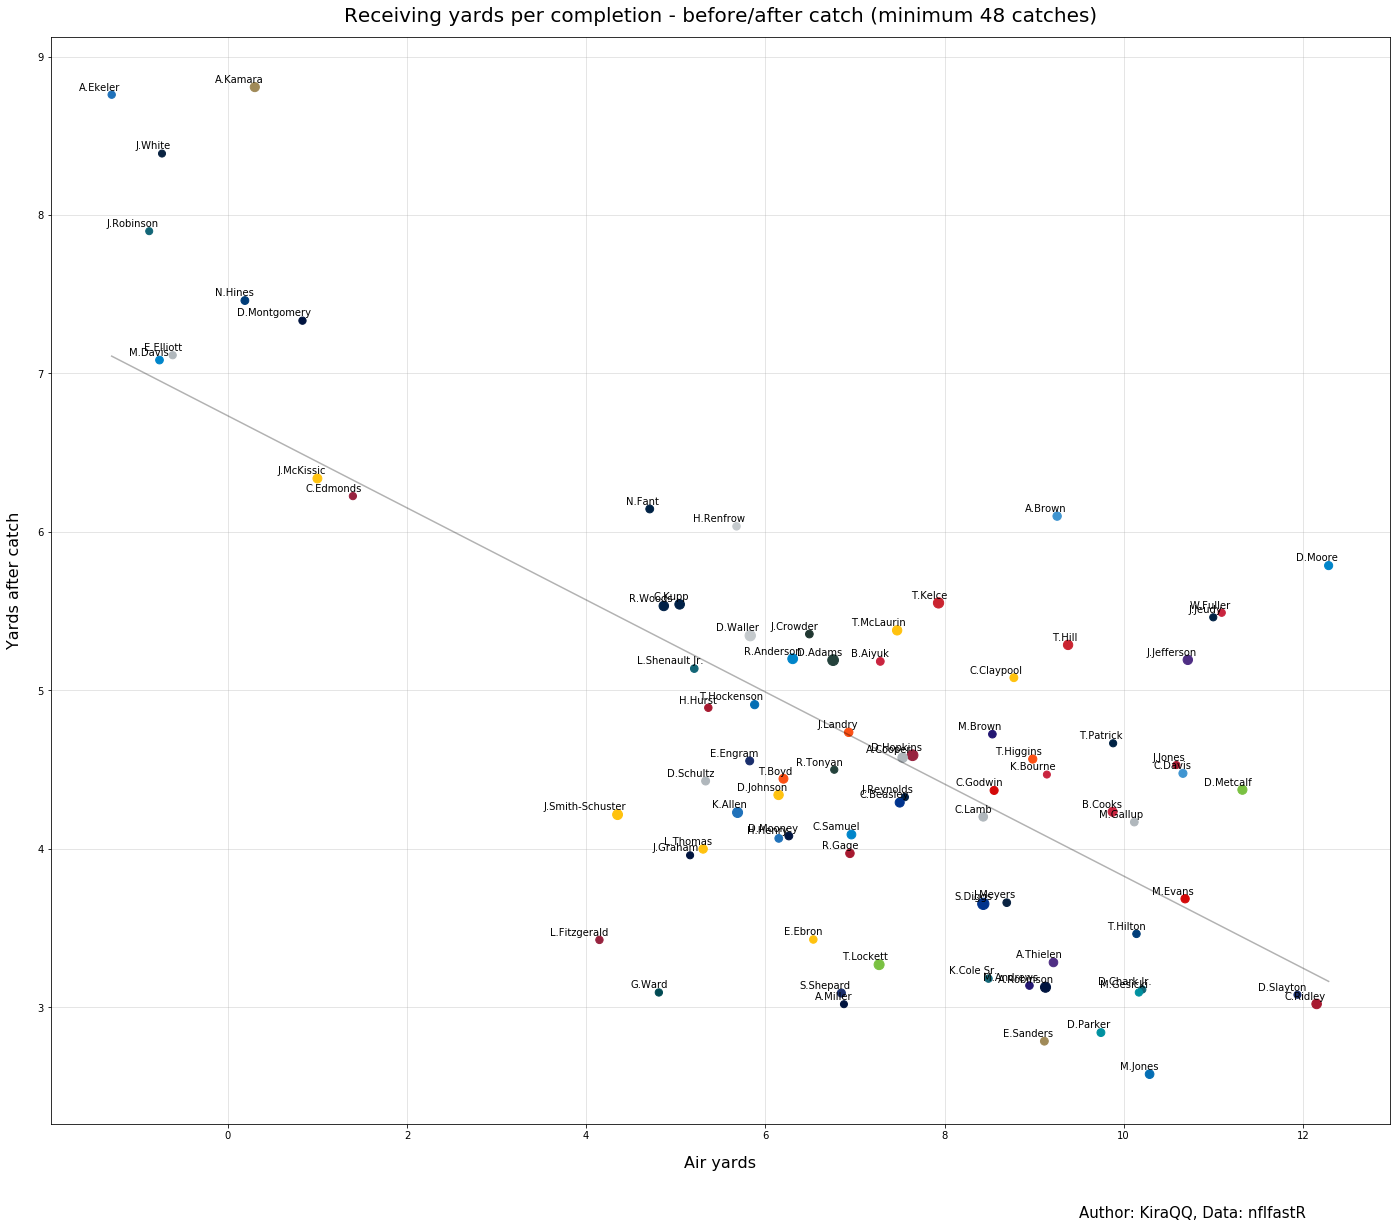

In [17]:
fig, ax = plt.subplots(figsize=(24,20))
wr_data_comp['color'] = wr_data_comp['posteam'].map(COLORS)
ax.scatter(x = wr_data_comp.air, y = wr_data_comp.yac, s = wr_data_comp.Plays, c = wr_data_comp.color)

texts = [plt.text(x0+0.1,y0+0.015,name,ha='right',va='bottom') for x0,y0,name in zip(
    wr_data_comp.air, wr_data_comp.yac, wr_data_comp.index)]


#adjust_text(texts)

#Add grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Add trend line
m, b = np.polyfit(wr_data_comp.air, wr_data_comp.yac, 1)
plt.plot(wr_data_comp.air, m*wr_data_comp.air + b, 'k', alpha=.3,linestyle='-')

#Add title, labels, and cite the data source
ax.set_title('Receiving yards per completion - before/after catch (minimum 48 catches)',fontsize=20,pad=15)
ax.set_xlabel('Air yards', fontsize=16,labelpad=15)
ax.set_ylabel('Yards after catch',fontsize=16,labelpad=15)
plt.figtext(.72,.06,'Author: KiraQQ, Data: nflfastR',fontsize=15)

In [18]:
rb_data = (
    df.groupby(['rusher','posteam']).agg({'epa': 'mean','success': 'mean', 'yards_gained': 'sum', 'rush_touchdown': 'sum', 'wpa': 'count'})
    ).reset_index(level='posteam')

rb_data = rb_data.loc[rb_data.wpa > 100]
rb_data.sort_values('epa', ascending=False, inplace=True)
rb_data.columns = ['posteam', 'EPA_play', 'success_rate', 'yards', 'rTD', 'Plays']

Text(0.72, 0.06, 'Author: KiraQQ, Data: nflfastR')

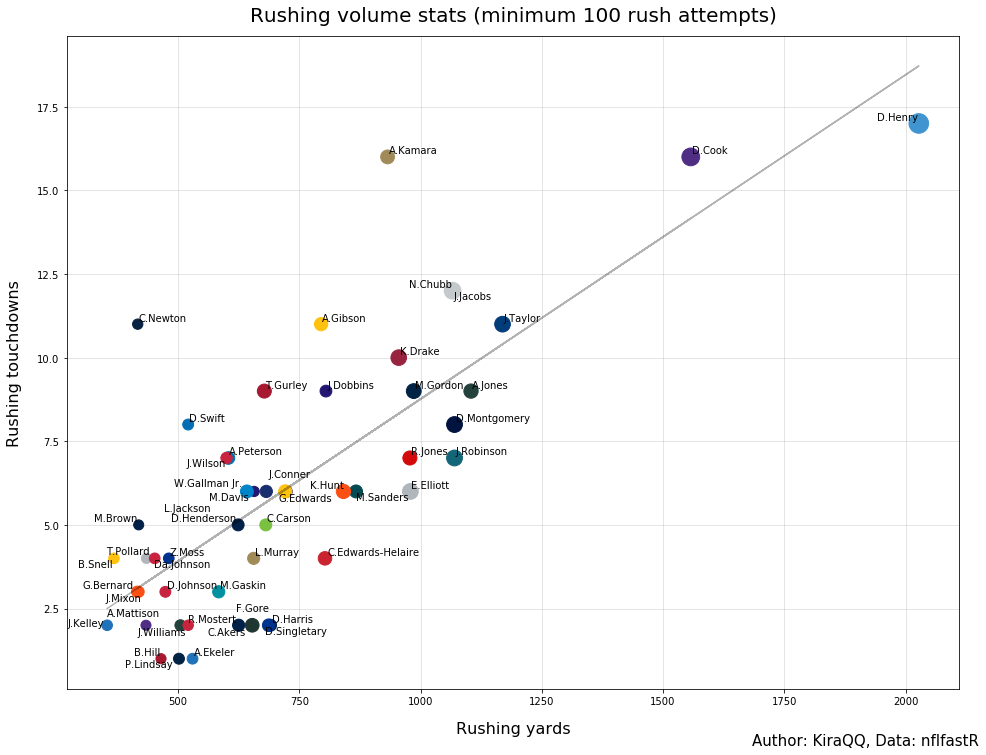

In [19]:
fig, ax = plt.subplots(figsize=(16,12))
rb_data['color'] = rb_data['posteam'].map(COLORS)
ax.scatter(x = rb_data.yards, y = rb_data.rTD, s = rb_data.Plays, c = rb_data.color)

texts = [plt.text(x0+0.1,y0+0.015,name,ha='right',va='bottom') for x0,y0,name in zip(
    rb_data.yards, rb_data.rTD, rb_data.index)]


adjust_text(texts)

#Add grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Add trend line
m, b = np.polyfit(rb_data.yards, rb_data.rTD, 1)
plt.plot(rb_data.yards, m*rb_data.yards + b, 'k', alpha=.3,linestyle='-')

#Add title, labels, and cite the data source
ax.set_title('Rushing volume stats (minimum 100 rush attempts)',fontsize=20,pad=15)
ax.set_xlabel('Rushing yards', fontsize=16,labelpad=15)
ax.set_ylabel('Rushing touchdowns',fontsize=16,labelpad=15)
plt.figtext(.72,.06,'Author: KiraQQ, Data: nflfastR',fontsize=15)

Text(0.72, 0.06, 'Author: KiraQQ, Data: nflfastR')

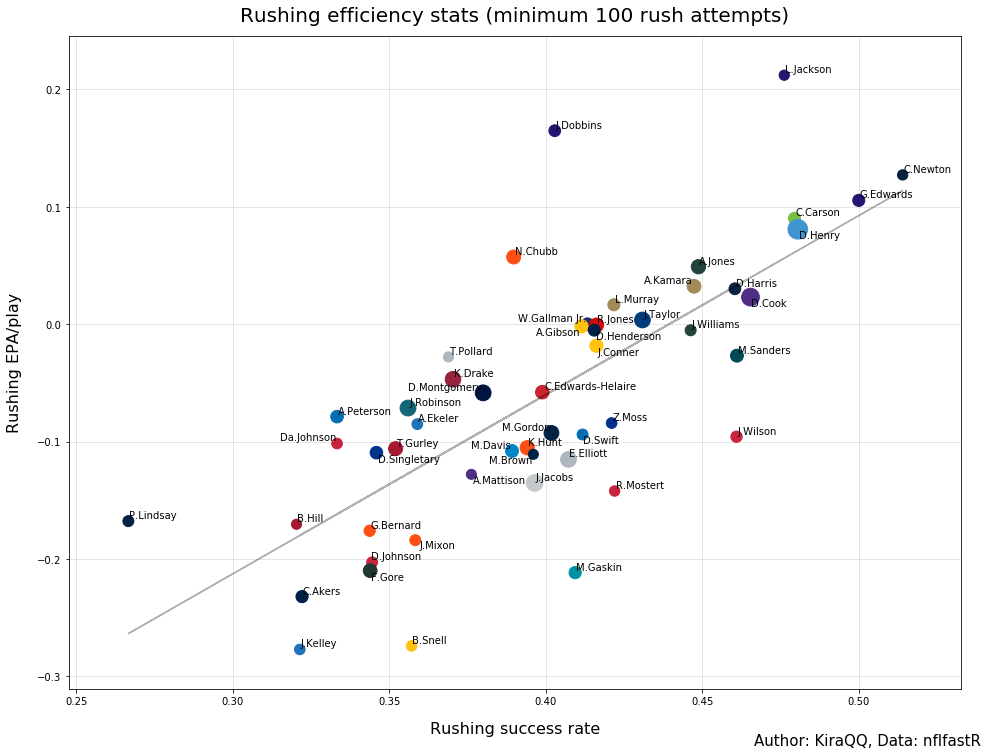

In [20]:
fig, ax = plt.subplots(figsize=(16,12))
rb_data['color'] = rb_data['posteam'].map(COLORS)
ax.scatter(x = rb_data.success_rate, y = rb_data.EPA_play, s = rb_data.Plays, c = rb_data.color)

texts = [plt.text(x0,y0,name,ha='right',va='bottom') for x0,y0,name in zip(
    rb_data.success_rate, rb_data.EPA_play, rb_data.index)]


adjust_text(texts)

#Add grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Add trend line
m, b = np.polyfit(rb_data.success_rate, rb_data.EPA_play, 1)
plt.plot(rb_data.success_rate, m*rb_data.success_rate + b, 'k', alpha=.3,linestyle='-')

#Add title, labels, and cite the data source
ax.set_title('Rushing efficiency stats (minimum 100 rush attempts)',fontsize=20,pad=15)
ax.set_xlabel('Rushing success rate', fontsize=16,labelpad=15)
ax.set_ylabel('Rushing EPA/play',fontsize=16,labelpad=15)
plt.figtext(.72,.06,'Author: KiraQQ, Data: nflfastR',fontsize=15)